In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from labwork import *

### lab 2.2

In [2]:
nu = np.arange(1, 11) * 1e-9
freqs = np.array([12.4, 9.08, 7.38, 6.31, 5.71, 5.25, 4.83, 4.57, 4.28, 4.08]) * 1e3

nu, freqs
df = pd.DataFrame()
df[r"$\nu [нФ]$"] = nu * 1e9
df[r"$f [Гц]$"] = freqs
df

,$\nu [нФ]$,$f [Гц]$
0,1.0,12400.0
1,2.0,9080.0
2,3.0,7380.0
3,4.0,6310.0
4,5.0,5710.0
5,6.0,5250.0
6,7.0,4830.0
7,8.0,4570.0
8,9.0,4280.0
9,10.0,4080.0


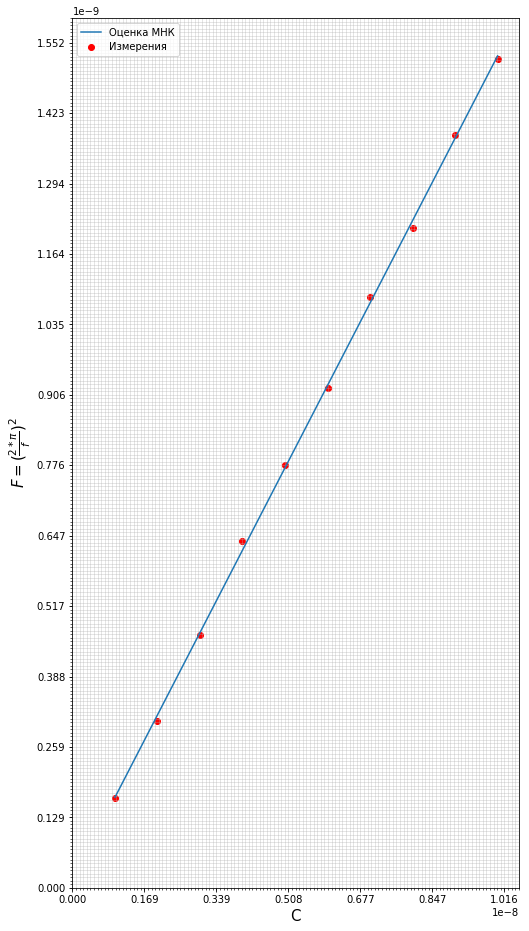

In [3]:
F = (1./(2. * np.pi * freqs)**2)
a, b, sigma_a, sigma_b = linPlot(nu, F, xlabel="C", ylabel=r"$F = (\frac{2*\pi}{f})^2$", labplot=True)

In [4]:
sciPrintR(b *1e3, sigma_b, "L [мГн] = ")

L [мГн] =  151.339220699 +- 0.148511782359 ( 0.09813172135670437 %)


In [5]:
f_resonance = 7.37

In [6]:
# АЧХ
f = np.array(
    [7.38, 7.44, 7.50, 7.55, 7.6 , 7.66, 7.7 , 7.75, 7.8 , 7.32, 7.29, 7.26, 7.23, 7.2 , 7.15, 7.85]
)
uy = np.array(
    [7.4 , 7.  , 6.55, 6.  , 5.4 , 4.8 , 4.4 , 4.2 , 3.8 , 6.6 , 5.4 , 4.8 , 3.8 , 3.4 , 2.8 , 3.4]
)  # 20 мВ # 7.4 = 7.1
ux = np.array(
    [6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.]
)  #0.1 В

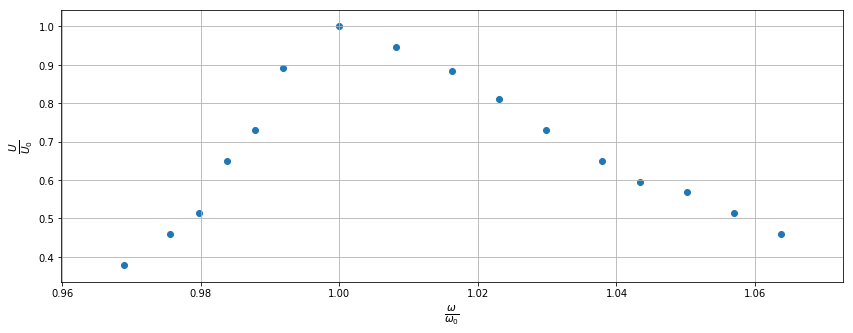

In [7]:

plt.figure(figsize=(14, 5))
plt.scatter(f / f[0], uy / uy.max())
#plt.plot(f / f[0], uy / uy.max())
plt.xlabel(r"$\frac{\omega}{\omega_0}$", fontsize=15)
plt.ylabel(r"$\frac{U}{U_0}$", fontsize=15)
plt.grid()
plt.show()

ω 0 − ω = ∆ω/2 = γ.

$\frac{\Delta\omega}{\omega_0} = \frac{1}{Q}$

In [8]:
delta_f = (7.6 - 7.29)
Q = f[0] / (delta_f )
Q

23.806451612903256

___________________________________________
### lab 2.1

In [9]:
multiplier = 0.0005  # 0.5 ms
T = 7.8 / 6
T_RE = 0.2 / 7.8  # 0.2 - цена деления

sciPrintR(T, T_RE, "T =")
ts_re = np.array([
    [6. , 0],
    [4.6 , 30],
    [3.9 , 60],
    [3.2 , 90],
    [2.5, 120],
    [2.2, 150],
    [2.  , 180],
    [1.8 , 210],
    [1.65, 240]
]) # 0.5 ms

ts_re_1 = np.array([
    [6.1 , 0],
    [4.9 , 30],
    [3.6 , 60],
    [3.4 , 90],
    [2.6, 120],
    [2.3, 150],
    [2.15, 180],
    [2.08, 210],
    [2.02, 240]
])  # 0.5 ms

ts_re_2 = np.array([
    [1.6, 0],
    [1.5 , 30],  # 1.3 - 1.5
    [1.2 , 60],
    [1.1 , 90],
    [1.05, 120],
])  # 1 ms

df = pd.DataFrame()
df[r"$R_k [Ом]$"] = ts_re[:, 1]
df[r"$t [с]$"] = [sciRoundR(ts_re[i, 0] * multiplier, 0.2 / ts_re[i, 0]) for i in range(len(ts_re[:,0]))]
df

T = 1.3 +- 0.03333333333333334 ( 2.5641025641025643 %)


,$R_k [Ом]$,$t [с]$
0,0.0,3000 ± 100 [1e-6] (3%)
1,30.0,2300 ± 100 [1e-6] (4%)
2,60.0,1950 ± 100 [1e-6] (5%)
3,90.0,1600 ± 100 [1e-6] (6%)
4,120.0,1250 ± 100 [1e-6] (8%)
5,150.0,1100 ± 100 [1e-6] (9%)
6,180.0,1000 ± 100 [1e-6] (10%)
7,210.0,900 ± 100 [1e-6] (11%)
8,240.0,830 ± 100 [1e-6] (12%)


In [10]:
T = T * multiplier
ts_re[:, 0] = ts_re[:, 0] * multiplier 

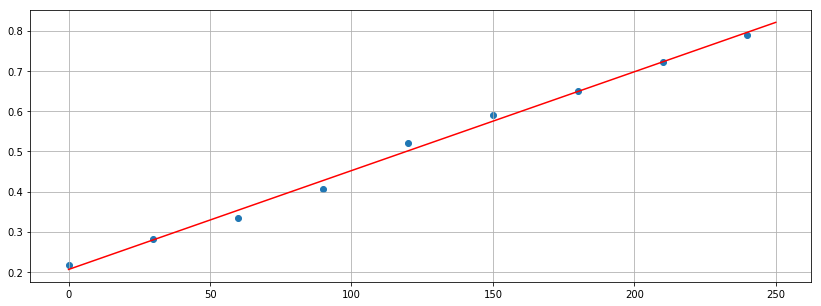

In [11]:
plt.figure(figsize=(14,5))
a, b, sigma_a, sigma_b = eval_mnk(ts_re[:, 1], T / ts_re[:, 0])

plt.plot([0, 250], b * np.array([0, 250]) + a, color="red")
plt.scatter(ts_re[:, 1], T / ts_re[:, 0])
plt.grid()
plt.show()

In [12]:
Rkr =  a / b
Rkr_RE = prodErrorR([sigma_a, sigma_b])
sciPrintR(Rkr, Rkr_RE, "Rkr = ")

Rkr =  83.9888584505 +- 0.38021556924 ( 0.452697627107 %)


In [13]:
a

0.20631776704240479

______________________
### Обработка результатовъ

In [14]:
sciPrintR(T * 1e6, T_RE, "T =")

T = 650.0000000000001 +- 16.66666666666667 ( 2.5641025641025643 %)


In [15]:
gamma = 1. / ts_re[:, 0]
lambd = gamma * T
lambd_RE = [prodErrorR([T_RE, 0.2 * multiplier / ts]) for ts in ts_re[:,0]]

In [17]:
lambd_rounded = []
for i in range(len(lambd)):
    sciPrintR(lambd[i], lambd_RE[i], "lambd (Rk = {}) =".format(ts_re[i, 1]))
    lambd_rounded.append(sciRoundR(lambd[i],lambd_RE[i]))
df["$\lambda$"] = lambd_rounded
df

lambd (Rk = 0.0) = 0.216666666667 +- 0.0091117885927 ( 4.20544088894 %)
lambd (Rk = 30.0) = 0.282608695652 +- 0.0142649419315 ( 5.04759483731 %)
lambd (Rk = 60.0) = 0.333333333333 +- 0.0191116921154 ( 5.73350763461 %)
lambd (Rk = 90.0) = 0.40625 +- 0.0274443214953 ( 6.75552529114 %)
lambd (Rk = 120.0) = 0.52 +- 0.0436845256101 ( 8.40087030963 %)
lambd (Rk = 150.0) = 0.590909090909 +- 0.0558148749018 ( 9.44559421415 %)
lambd (Rk = 180.0) = 0.65 +- 0.067102740464 ( 10.3234985329 %)
lambd (Rk = 210.0) = 0.722222222222 +- 0.0823559510131 ( 11.4031316787 %)
lambd (Rk = 240.0) = 0.787878787879 +- 0.0976138274815 ( 12.3894473342 %)


,$R_k [Ом]$,$t [с]$,$\lambda$
0,0.0,3000 ± 100 [1e-6] (3%),217 ± 9 [1e-3] (4%)
1,30.0,2300 ± 100 [1e-6] (4%),283 ± 14 [1e-3] (5%)
2,60.0,1950 ± 100 [1e-6] (5%),330 ± 20 [1e-3] (6%)
3,90.0,1600 ± 100 [1e-6] (6%),410 ± 30 [1e-3] (7%)
4,120.0,1250 ± 100 [1e-6] (8%),520 ± 40 [1e-3] (8%)
5,150.0,1100 ± 100 [1e-6] (9%),590 ± 60 [1e-3] (9%)
6,180.0,1000 ± 100 [1e-6] (10%),650 ± 70 [1e-3] (10%)
7,210.0,900 ± 100 [1e-6] (11%),720 ± 80 [1e-3] (11%)
8,240.0,830 ± 100 [1e-6] (12%),790 ± 100 [1e-3] (12%)


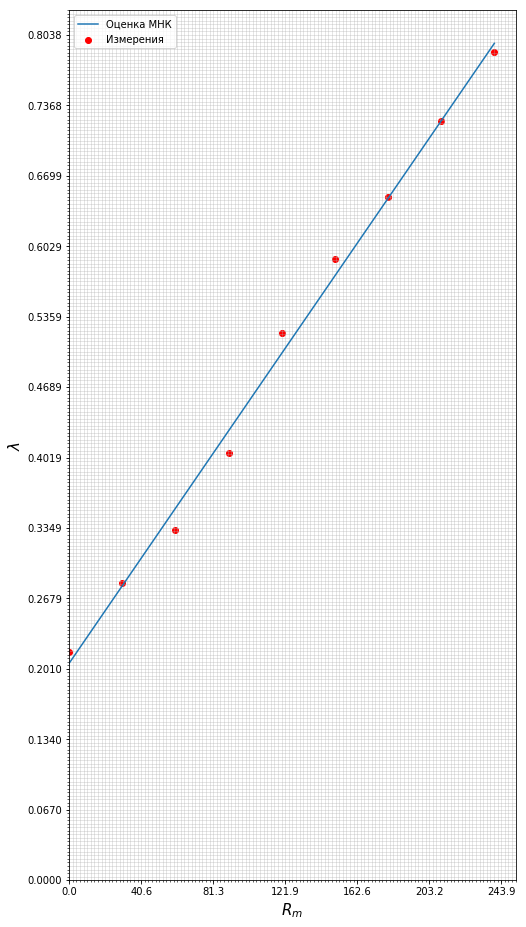

In [18]:
a, b, sigma_a, sigma_b = linPlot(ts_re[:, 1], lambd, xlabel=r"$R_m$", ylabel=r"$\lambda$", labplot=True)

In [19]:
R_coil = a / b
R_coil_RE = prodErrorR([sigma_a, sigma_b])
sciPrintR(R_coil, R_coil_RE, "R_coil = ")

R_coil =  83.9888584505 +- 0.38021556924 ( 0.452697627107 %)


In [20]:
Q = np.pi / lambd
Q_RE = lambd_RE
for i in range(len(Q)):
    sciPrintR(Q[i], Q_RE[i], "Q (Rk = {}) =".format(ts_re[i, 1]))
df["$Q$"] = [sciRoundR(Q[i], Q_RE[i]) for i in range(len(Q))]
df

Q (Rk = 0.0) = 14.4996584012 +- 0.60977456316 ( 4.20544088894 %)
Q (Rk = 30.0) = 11.1164047742 +- 0.561111073479 ( 5.04759483731 %)
Q (Rk = 60.0) = 9.42477796077 +- 0.540370363926 ( 5.73350763461 %)
Q (Rk = 90.0) = 7.7331511473 +- 0.522414981558 ( 6.75552529114 %)
Q (Rk = 120.0) = 6.04152433383 +- 0.50754062401 ( 8.40087030963 %)
Q (Rk = 150.0) = 5.31654141377 +- 0.502178928172 ( 9.44559421415 %)
Q (Rk = 180.0) = 4.83321946706 +- 0.498957340775 ( 10.3234985329 %)
Q (Rk = 210.0) = 4.34989752036 +- 0.496024542136 ( 11.4031316787 %)
Q (Rk = 240.0) = 3.98740606033 +- 0.494017573844 ( 12.3894473342 %)


,$R_k [Ом]$,$t [с]$,$\lambda$,$Q$
0,0.0,3000 ± 100 [1e-6] (3%),217 ± 9 [1e-3] (4%),14500 ± 600 [1e-3] (4%)
1,30.0,2300 ± 100 [1e-6] (4%),283 ± 14 [1e-3] (5%),11100 ± 600 [1e-3] (5%)
2,60.0,1950 ± 100 [1e-6] (5%),330 ± 20 [1e-3] (6%),9400 ± 500 [1e-3] (6%)
3,90.0,1600 ± 100 [1e-6] (6%),410 ± 30 [1e-3] (7%),7700 ± 500 [1e-3] (7%)
4,120.0,1250 ± 100 [1e-6] (8%),520 ± 40 [1e-3] (8%),6000 ± 500 [1e-3] (8%)
5,150.0,1100 ± 100 [1e-6] (9%),590 ± 60 [1e-3] (9%),5300 ± 500 [1e-3] (9%)
6,180.0,1000 ± 100 [1e-6] (10%),650 ± 70 [1e-3] (10%),4800 ± 500 [1e-3] (10%)
7,210.0,900 ± 100 [1e-6] (11%),720 ± 80 [1e-3] (11%),4300 ± 500 [1e-3] (11%)
8,240.0,830 ± 100 [1e-6] (12%),790 ± 100 [1e-3] (12%),4000 ± 500 [1e-3] (12%)


$\gamma = \frac{R}{2L}$

In [21]:
L_values = (ts_re[:, 1] + R_coil) / (2.* gamma)
L = L_values.mean()
L_RE = L_values.std(ddof=1)
sciPrintR(L*1e3, L_RE, "L = ")

L =  132.30804744 +- 0.648692349956 ( 0.490289413612 %)


$T = 2\pi \sqrt{LC}$

In [22]:
C = (T / (2. * np.pi))**2 / L
C_RE = prodErrorR_degs([(2, T_RE), (-1, L_RE)])
sciPrintR(C, C_RE, "C = ")

C =  8.08873702641e-08 +- 4.16698505114e-09 ( 5.15158922528 %)


In [23]:
R_crit = 2. * sqrt(L/C)
sciPrintR(R_crit, prodErrorR_degs([(0.5, L_RE), (0.5, C_RE)]), "R_crit = ")

R_crit =  2557.895322147664 +- 66.1838488476 ( 2.58743382791 %)


In [24]:
Q_RCL = 1. / (ts_re[:, 1] + R_coil) * sqrt(L / C)
Q_RCL_RE = prodErrorR_degs([(0.5, L_RE), (0.5, C_RE), (-1, R_coil_RE)])  # на погрешность сопротивления забили, маленькая
for i, q_rcl in enumerate(Q_RCL):
    sciPrintR(q_rcl, Q_RCL_RE, "Q_RCL (R = {})=".format(ts_re[i, 1]))
    
df["$Q_{RCL}$"] = [sciRoundR(Q_RCL[i], Q_RCL_RE) for i in range(len(Q))]
df

Q_RCL (R = 0.0)= 15.2275871427 +- 0.399988714619 ( 2.62673732135 %)
Q_RCL (R = 30.0)= 11.219935689 +- 0.294718238174 ( 2.62673732135 %)
Q_RCL (R = 60.0)= 8.88226821739 +- 0.233313854249 ( 2.62673732135 %)
Q_RCL (R = 90.0)= 7.35074459631 +- 0.193084751708 ( 2.62673732135 %)
Q_RCL (R = 120.0)= 6.26969370184 +- 0.164688384401 ( 2.62673732135 %)
Q_RCL (R = 150.0)= 5.46584854314 +- 0.143573483611 ( 2.62673732135 %)
Q_RCL (R = 180.0)= 4.84470317642 +- 0.127257626444 ( 2.62673732135 %)
Q_RCL (R = 210.0)= 4.35032697434 +- 0.114271662236 ( 2.62673732135 %)
Q_RCL (R = 240.0)= 3.94750506913 +- 0.103690588913 ( 2.62673732135 %)


,$R_k [Ом]$,$t [с]$,$\lambda$,$Q$,$Q_{RCL}$
0,0.0,3000 ± 100 [1e-6] (3%),217 ± 9 [1e-3] (4%),14500 ± 600 [1e-3] (4%),15200 ± 400 [1e-3] (3%)
1,30.0,2300 ± 100 [1e-6] (4%),283 ± 14 [1e-3] (5%),11100 ± 600 [1e-3] (5%),11200 ± 300 [1e-3] (3%)
2,60.0,1950 ± 100 [1e-6] (5%),330 ± 20 [1e-3] (6%),9400 ± 500 [1e-3] (6%),8900 ± 200 [1e-3] (3%)
3,90.0,1600 ± 100 [1e-6] (6%),410 ± 30 [1e-3] (7%),7700 ± 500 [1e-3] (7%),7400 ± 200 [1e-3] (3%)
4,120.0,1250 ± 100 [1e-6] (8%),520 ± 40 [1e-3] (8%),6000 ± 500 [1e-3] (8%),6270 ± 160 [1e-3] (3%)
5,150.0,1100 ± 100 [1e-6] (9%),590 ± 60 [1e-3] (9%),5300 ± 500 [1e-3] (9%),5470 ± 140 [1e-3] (3%)
6,180.0,1000 ± 100 [1e-6] (10%),650 ± 70 [1e-3] (10%),4800 ± 500 [1e-3] (10%),4840 ± 130 [1e-3] (3%)
7,210.0,900 ± 100 [1e-6] (11%),720 ± 80 [1e-3] (11%),4300 ± 500 [1e-3] (11%),4350 ± 110 [1e-3] (3%)
8,240.0,830 ± 100 [1e-6] (12%),790 ± 100 [1e-3] (12%),4000 ± 500 [1e-3] (12%),3950 ± 100 [1e-3] (3%)


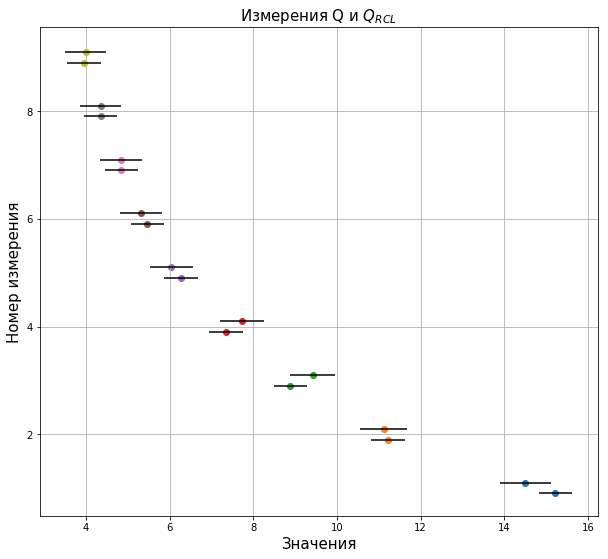

In [25]:
plotIntervals(Q_RCL, [Q_RCL_RE * Q_RCL] * len(Q_RCL), Q, Q_RE * Q, title="Измерения Q и $Q_{RCL}$")

In [26]:
sciRoundR(219.20056, 0.00145754, unit="Гн")

'219200 ± 300 [1e-3 x Гн] (0.15%)'

In [316]:
1// 3

0